In [1]:
!nvidia-smi

Thu Nov  9 12:44:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
! pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 9.9 MB/s eta 0:00:00


In [3]:
# imports
import os
from ultralytics import YOLO

In [4]:
# define paths
ROOT_DIR = "/content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8"
TRAIN = os.path.join(ROOT_DIR, "config.yaml")

In [5]:
TRAIN   # output path

'/content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/config.yaml'

In [13]:
%%time
# load YOLOv8 model
# model = YOLO('yolov8n.yaml')
model = YOLO('yolov8s.yaml')

# train model
results = model.train(data=TRAIN, epochs=100)


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

CPU times: user 4min 51s, sys: 42.3 s, total: 5min 33s
Wall time: 9min 11s


In [7]:
# run the model on images
results = model("/content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test/images")


image 1/16 /content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test/images/180px-sydney_utility_pole_jpg.rf.c1d57e29aa0cb587df703d750e6d0030.jpg: 640x640 (no detections), 7.0ms
image 2/16 /content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test/images/29c9bb3b21371371c53261c5dbafd0d5_jpg.rf.55c3138f966a83284593a3253a7bd50f.jpg: 640x640 (no detections), 7.1ms
image 3/16 /content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test/images/Copy of 2djqe7gs6x221_jpg.rf.78cbcbd2e4705f4632e9b64ae84b0f5a.jpg: 640x640 (no detections), 6.8ms
image 4/16 /content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test/images/Copy of 2djqe7gs6x221_jpg.rf.8d2f74c64030bdb88ea7788d79075c21.jpg: 640x640 (no detections), 6.9ms
image 5/16 /content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test

In [8]:
# preview results object
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'aerial-pole'}
orig_img: array([[[180, 140,  98],
        [178, 138,  96],
        [175, 135,  93],
        ...,
        [182, 143,  98],
        [182, 143,  98],
        [182, 143,  98]],

       [[173, 133,  91],
        [176, 136,  94],
        [179, 139,  97],
        ...,
        [183, 144,  99],
        [183, 144,  99],
        [183, 144,  99]],

       [[170, 130,  88],
        [175, 135,  93],
        [180, 140,  98],
        ...,
        [184, 145, 100],
        [184, 145, 100],
        [184, 145, 100]],

       ...,

       [[ 58, 120, 120],
        [ 52, 114, 114],
        [ 45, 107, 107],
        ...,
        [134, 160, 174],
        [122, 142, 159],
        [113, 131, 148]],

       [[ 56, 118, 118],
        [ 51, 113, 113],
        [ 46, 108, 108],
        ...,
        [155, 181, 195],
        [144, 162, 179],
        [135, 151,

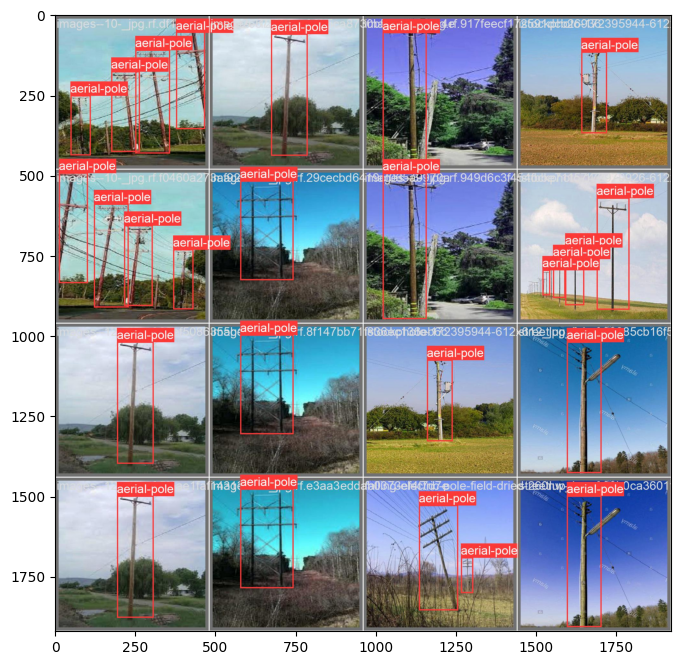

In [9]:
# plot output collage
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(12, 8))
img = mpimg.imread('/content/drive/MyDrive/EY Experiments/Fiber StreetView/val_batch1_labels.jpg')
imgplot = plt.imshow(img)
plt.show()

---

In [10]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [11]:
!pip freeze > requirements.txt

# EXPERIMENTS

## Extract

In [12]:
import subprocess

# Replace 'your_yolov8_command' with the actual command to run your YOLOv8 model
command = model("/content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test/images")

# Run the YOLOv8 model and capture the output
output = subprocess.check_output(command, shell=True).decode('utf-8')



image 1/16 /content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test/images/180px-sydney_utility_pole_jpg.rf.c1d57e29aa0cb587df703d750e6d0030.jpg: 640x640 (no detections), 8.0ms
image 2/16 /content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test/images/29c9bb3b21371371c53261c5dbafd0d5_jpg.rf.55c3138f966a83284593a3253a7bd50f.jpg: 640x640 (no detections), 7.7ms
image 3/16 /content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test/images/Copy of 2djqe7gs6x221_jpg.rf.78cbcbd2e4705f4632e9b64ae84b0f5a.jpg: 640x640 (no detections), 7.3ms
image 4/16 /content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test/images/Copy of 2djqe7gs6x221_jpg.rf.8d2f74c64030bdb88ea7788d79075c21.jpg: 640x640 (no detections), 7.5ms
image 5/16 /content/drive/MyDrive/EY Experiments/Fiber StreetView/YOLO/YOLOv8/utility-pole-label.v4i.yolov8/test

TypeError: ignored

In [ ]:
# run the model on images
results = model("/content/drive/MyDrive/EY Experiments/Fiber StreetView/Google Street Images")